#FINAL PROJECT 
#SUBJECT: CST 3602
#SAGAR GHIMIRE 

In [1]:
# Importing pandas and numpy libraries.
import pandas as pd
import numpy as np

In [2]:
# Importing the datset from NYC Open Data.
!curl https://data.cityofnewyork.us/api/views/rsgh-akpg/rows.csv?Type=DOWNLOAD -o df.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1308k    0 1308k    0     0   505k      0 --:--:--  0:00:02 --:--:--  505k


In [3]:
#Displaying the dataframe of the dataset.
df=pd.read_csv("df.csv")
df.head(2)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
0,1,January 01 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,11220
1,2,January 04 2018,DOG,UNKNOWN,NaN,U,False,Brooklyn,NaN


**The dataset has 22663 rows and 9 columns. Many of values for columns Age, Gender, ZipCode are missing in this data set. We are mainly working with DateOfBite, Breed, Gender and Borough in this project.**

In [4]:
# Changing the 'DateOfBite' column into datetime Index and sorting dates in ascending order.
df["DateOfBite"]=pd.to_datetime(df["DateOfBite"])
df1=df.sort_values(by='DateOfBite')
df1.head(1)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode
16425,4043,2015-01-01,DOG,Mixed/Other,10,M,True,Manhattan,10065


In [5]:
# Checking the shape of dataset.
df1.shape

(22663, 9)

 **Note:-**The data set has 22,663 rows and 9 columns. We are mainly working with DateOfBite, Breed, Gender and Borough in this project.We are using these columns during the data exploration and removing the NaN values only when it is required. 

# Question no.1
# The trend of dogs bite throughout the given time frame from 2015 to 2021 using a time-series plot.

In [6]:
#Creating a pivot table.
time_series_pivot_table=df1.pivot_table(values="UniqueID", index="DateOfBite", aggfunc="count")
time_series_pivot_table.reset_index().head(2)


,DateOfBite,UniqueID
0,2015-01-01,7
1,2015-01-02,10


In [7]:
# Import matplotlib library at first
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (25, 5)

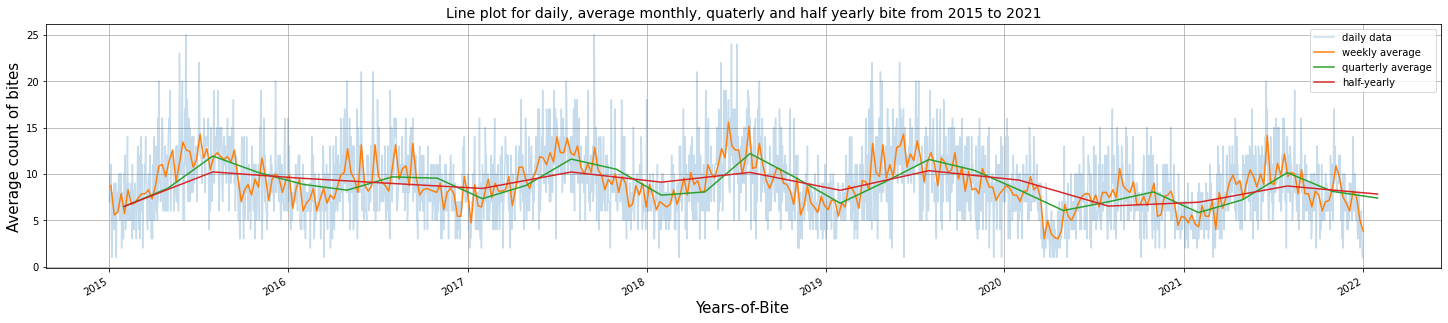

In [8]:

# Draw initial time series and make it transparent.
ax =time_series_pivot_table.plot(alpha=0.25)
# Draw average values.
time_series_pivot_table.resample('W').mean().plot(ax=ax)
time_series_pivot_table.resample('3M').mean().plot(ax=ax)
time_series_pivot_table.resample('6M').mean().plot(ax=ax)
plt.xlabel("Years-of-Bite", fontsize=15)
plt.ylabel("Average count of bites", fontsize=15)
plt.title("Line plot for daily, average monthly, quaterly and half yearly bite from 2015 to 2021", fontsize=14);
plt.grid(True)
# Specify legend labels
ax.legend(["daily data", "weekly average", "quarterly average", "half-yearly"])
plt.show()

# Answer

 The daily, weekly, quaterly and half yearly count seems to be following similar pattern for years 2015,2016, 2017, 2018 and 2019 with small up and down. However, the plot has a big drop in year 2020. In 2020, covid-19 was in rise so, people were not going out with their dogs for a walk or travel. The line plot for 2021 seems to be increasing slowly because people were getting vaccinated and covid spread was slowing down.

In [9]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Qn.2
#Analyzing the relation between weather and the number of bites using the heat map for each month for the given time frame.

In [10]:
weather_vs_num_bite=df1.pivot_table(values="UniqueID", index="DateOfBite", aggfunc="count")
weather_vs_num_bite.head(2)


,UniqueID
DateOfBite,
2015-01-01,7
2015-01-02,10


In [11]:
# Installing calplot
!pip install calplot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
# Importing datetime and calplot
from datetime import datetime
import calplot

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


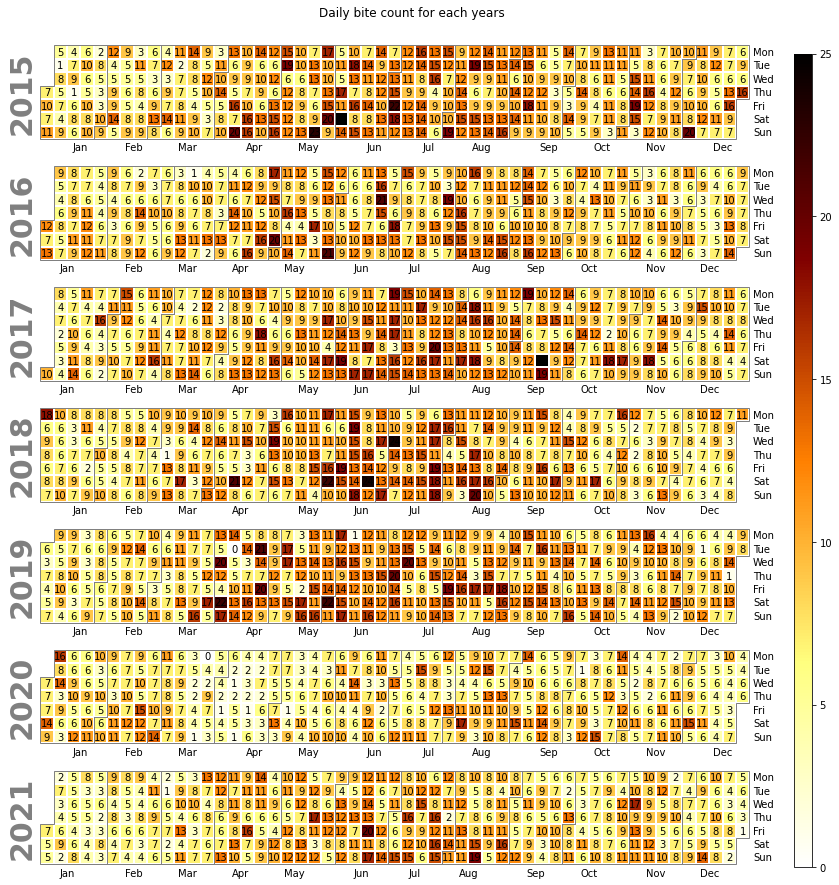

In [13]:
# Plotting a heat map for each years with daily count for each months.
calplot.calplot(weather_vs_num_bite["UniqueID"],cmap="afmhot_r", suptitle="Daily bite count for each years", 
                textformat="{:.0f}", textfiller="-");

#Answer


The above heat map shows the daily dog bite counts for each month for each year. The heatmap has more dark red days for the months with better temperatrure and hot temperature like April to october. The months like november, december, january, february and march has overall  light red days of dog bite respectively as the temperature starts falling from november. This shows that people take their dogs out more in warmer temperature and less in winter.

In [14]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Qn.3
#Evaluating the number of bites for each year and comparing the total count for years
#2020 and 2021 especially with previous years to see any decrease in bites because of
#covid-19. For this evaluation, we are using a bar chart.

In [15]:
#3 Adding the year column in the initial sorted dataset 'df1', to add the total count of bites for each year.
df1['year'] = df1['DateOfBite'].dt.year
df1.head(2)

,UniqueID,DateOfBite,Species,Breed,Age,Gender,SpayNeuter,Borough,ZipCode,year
16425,4043,2015-01-01,DOG,Mixed/Other,10,M,True,Manhattan,10065,2015
12386,4,2015-01-01,DOG,American Pit Bull Terrier/Pit Bull,6,M,False,Brooklyn,11221,2015


In [16]:
year_df=df1[["UniqueID", "year"]]
year_df.head(1)

,UniqueID,year
16425,4043,2015


In [17]:
# Creating pivot table then dataframe by resetting index and changing column name respectively.
year_total_pivot= year_df.pivot_table(values="UniqueID",index="year", aggfunc="count")
year_total_bar=year_total_pivot.reset_index()
year_total_bar_final=year_total_bar.rename(columns={"UniqueID":"Count"})
year_total_bar_final

,year,Count
0,2015,3557
1,2016,3212
2,2017,3511
3,2018,3377
4,2019,3534
5,2020,2551
6,2021,2921


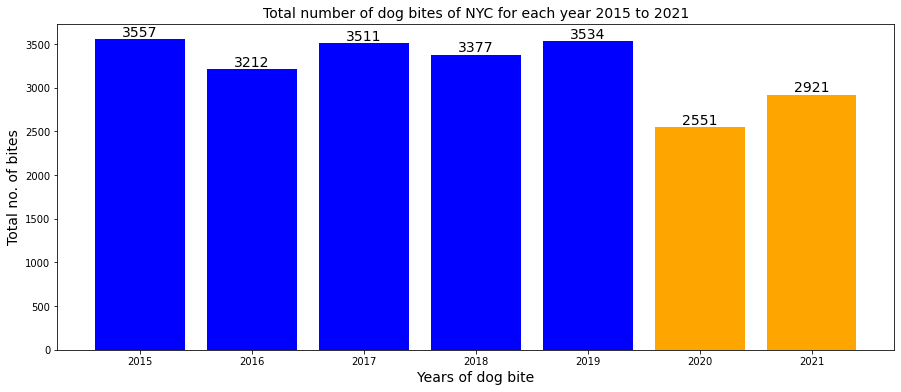

In [18]:
# plotting the bar chart and hightliting years 2020 and 2021 with different color from previous years.
plt.figure(figsize=(15, 6))
myplot=plt.bar(year_total_bar_final["year"], year_total_bar_final['Count'],color=['blue', 'blue', 'blue','blue','blue', 'orange', 'orange'])
plt.xlabel('Years of dog bite', fontsize=14)
plt.ylabel('Total no. of bites',fontsize=14)
plt.title('Total number of dog bites of NYC for each year 2015 to 2021', fontsize=14)
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(ycoor), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)

#Answers


The bar chart shows the bite counts for each year. The counts for years before 2020 seems to be similar with small up and down where as years 2020 and 2021 seems to have heavy decrease in numbers. The reason for this decrease is covid-19 for years 2020 and 2021.

In [19]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Q.n.4
#Analyzing the number of bites for each borough of NYC by gender. For this exploration, we are using a grouped bar chart.

In [20]:
# Creating a pivot table
boro_gender = df1.pivot_table(values="UniqueID", index="Borough", columns="Gender", aggfunc="count")
boro_gender_bar=boro_gender.sort_values(by=["F","M","U"])
boro_gender_bar

Gender,F,M,U
Borough,,,
Other,161,384,436
Staten Island,299,780,793
Bronx,555,1365,1862
Brooklyn,685,1894,2406
Manhattan,809,1973,2488
Queens,880,2343,2550


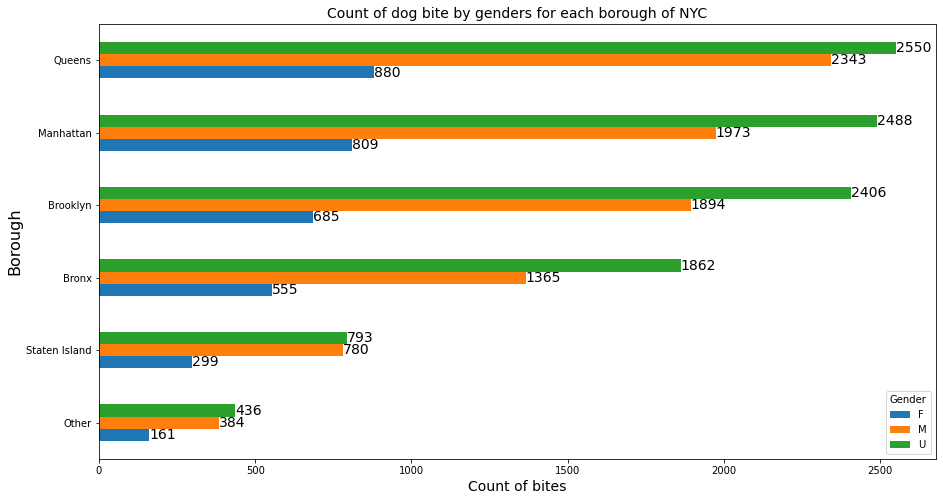

In [21]:
## plotting the grouped barchart
myplot = boro_gender_bar.plot(kind='barh', figsize = [15,8])
plt.xlabel('Count of bites', fontsize=14)
plt.ylabel('Borough', fontsize=16)
plt.title('Count of dog bite by genders for each borough of NYC', fontsize=14)

for rect in myplot.patches:
    ycoor = rect.get_y() + .5*rect.get_height()
    xcoor = rect.get_width()
    plt.text(xcoor, ycoor, str(int(xcoor)), 
             horizontalalignment='left', 
             verticalalignment='center',
             fontsize=14)

#Answer

From the grouped chart we see that Queens has the highest numbers of bite by gender followed by Manhattan, Brooklyn, Bronx and Staten Island. The only strange thing in this data set is 'other' attribute for borough of NYC. 

In [22]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Q.n.5
#Analyzing the number of bites for each borough using the total counts of bites by plotting bar chart and pie chart.

In [23]:
#Creating pivot table then dataframe by resetting index and renaming the column.
borowide=df1.pivot_table(values="UniqueID",index=["Borough"], aggfunc="count")
borowide1=borowide.rename(columns={"UniqueID":"Count"})
borowide_bar=borowide1.sort_values(by="Count")
borowide_bar_final=borowide_bar.reset_index()
borowide_bar_final


,Borough,Count
0,Other,981
1,Staten Island,1872
2,Bronx,3782
3,Brooklyn,4985
4,Manhattan,5270
5,Queens,5773


In [24]:
# Importing libraries 
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns

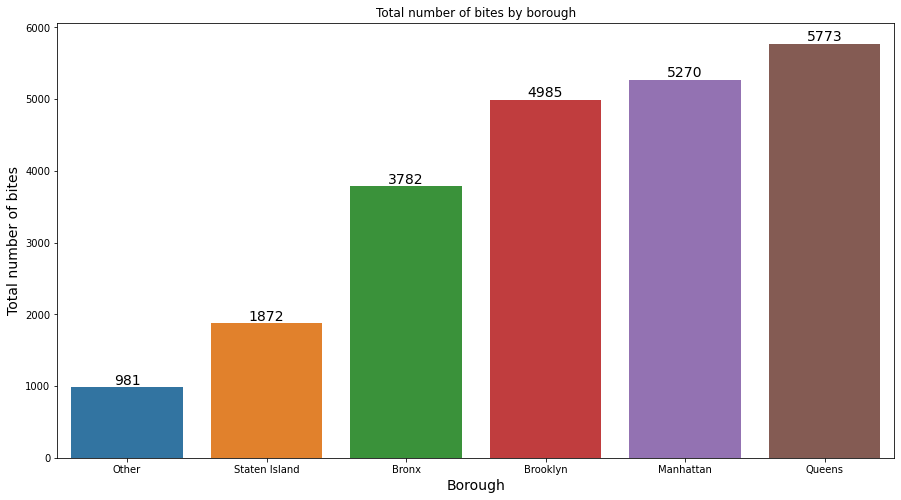

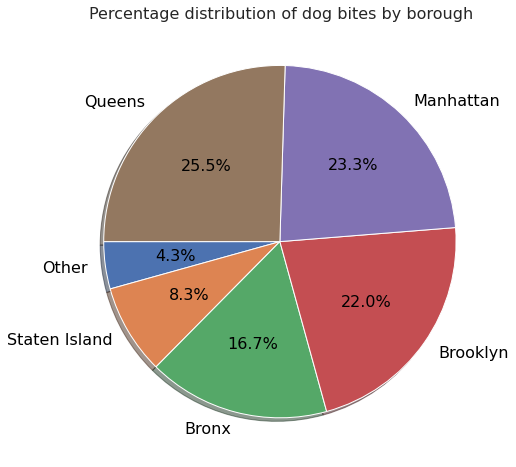

In [25]:

# Plotting bar chart using total number.

plt.figure(figsize=(15,8))
myplot=sns.barplot(x="Borough",y="Count",hue_order="Borough", data=borowide_bar_final)
plt.xlabel('Borough', fontsize=14)
plt.ylabel('Total number of bites', fontsize=14)
plt.title('Total number of bites by borough')
for rect in myplot.patches:
    xcoor = rect.get_x() + .5*rect.get_width()
    ycoor = rect.get_height()
    plt.text(xcoor, ycoor, str(int(ycoor)), 
             horizontalalignment='center', 
             verticalalignment='bottom',
             fontsize=14)
    
## Plotting pie chart using percentage.
sns.set(rc = {'figure.figsize':(7,8)})
labels=borowide_bar_final["Borough"]
sizes=borowide_bar_final["Count"]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=180, textprops = {'color': 'black','fontsize':16})
plt.title("Percentage distribution of dog bites by borough", fontsize=16)
plt.axis('equal')
plt.show(); 
    


#Answer

Both the charts above show that Queens has the highest number of total bite
 25.5%, followed by Manhattan, Broolyn, Bronx and Staten Island.Staten Island has the least bit of 8.3%. The exploration is somewhat affected by the attribute 'other' for Borough which has 4.3% of total bites.

In [26]:
#----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

#Q.n.6
#plot the stacked area Chart for bite by gender for all the given years.

In [27]:
#Creating a pivot table
gender_year=df1.pivot_table(values="UniqueID", index=["year","Gender"], aggfunc="count")
gender_year.reset_index().head(3)

,year,Gender,UniqueID
0,2015,F,554
1,2015,M,1398
2,2015,U,1605


In [28]:
#Setting sns_theme
sns.set_theme()

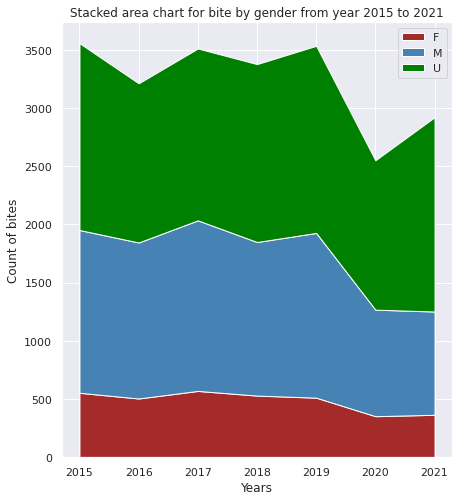

In [29]:
#Creating dataframe with years and numbers of bite for each gender.

datafr=pd.DataFrame({"year":[2015,2016,2017,2018,2019,2020,2021],
                     "F":[554,505,570,530,512,353,365],
                     "M":[1398,1340,1465,1319,1415,915,887],
                     "U":[1605,1367,1476,1528,1607,1283,1669]})
#define colors to use in chart
color_map = ['brown', 'steelblue', 'green']
#create area chart
plt.stackplot(datafr.year, datafr.F, datafr.M, datafr.U,
              labels=['F', 'M', 'U'],
              colors=color_map)

#add legend
plt.legend(loc='upper right')

#add axis labels
plt.xlabel('Years')
plt.ylabel('Count of bites')
plt.title("Stacked area chart for bite by gender from year 2015 to 2021")

#display area chart
plt.show()

#Answer

The above stacked chart shows that count of bites for female is very low in comparision to male and unknown attributes for gender. Male count seems to be way larger than female count. The strange part of this datset is that it has 'U' attribute for the gender which says unknown gender. This 'U' attribute makes it difficult to have a proper conclusion for gender bite because it has the highest number of bites for each year.So, we are conclusion less for this question.

In [30]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

# Q.n.7
# Plot a radial pie chart for the top five breeds with the highest bite counts.

In [31]:
# Creating a pivot table then dataframe for breeds of dogs by resetting index and replacing NaN values to 0.
breed= df1.pivot_table(values="UniqueID",index=["Breed"], aggfunc="count")
breed_value=breed.fillna(0)
breed_value_reset=breed_value.reset_index()
breed_value_reset.head(1)

,Breed,UniqueID
0,/SHIH TZU MIX,1


In [32]:
# Selecting only five breeds with highest number of bite. 
breed_five=breed_value_reset.nlargest(5, 'UniqueID')
breed_five1=breed_five.sort_values(by="UniqueID")
breed_five1

,Breed,UniqueID
659,German Shepherd,622
471,Chihuahua,646
1508,Shih Tzu,731
1551,UNKNOWN,2349
1249,Pit Bull,4004


In [33]:
#Importing altair
import altair as alt

In [34]:
# Plotting data with a radial pie chart using altair
base = alt.Chart(breed_five1).encode(
    theta=alt.Theta("UniqueID:Q", stack=True),
    radius=alt.Radius("UniqueID:Q", scale=alt.Scale(type="sqrt", zero=True, rangeMin=30)),
    color="Breed:N",
).properties(
    title={"text":["Count of highest bite by breed of dog"]
           }
)

c1 = base.mark_arc(innerRadius=10, stroke="#fff")

c2 = base.mark_text(radiusOffset=35).encode(text="UniqueID:N")


c1 + c2

alt.LayerChart(...)

#Answer

The plot shows that Pitbull has the highest number of bite 4004 and German Shepherd has the lowest number of bite 622. Chihuahua has 646, Shih Tzu has 731 and Unknown attribute has 2349 bites. 

In [35]:
#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

In [36]:
#######################################################################THE END##########################################################################